# General hint
1) For the data analysis below the python module 'pandas' is used as it (typically) provides a readable and understandable possibility to deal with data. Note that there might be many different ways to reach the same analysis goal. For introductory purposes readability is most important here but not necessarily performance.

2) In order the check the right paths, just run the whole notebook (Run all cells) -- this should not result in any errors.

# Introduction
The dataset used in this notebook is from the HPC cluster 'Taurus' at TU Dresden. The data contains sensor data about the temperature [°C] and power consumption [W] over time of a selection of compute nodes, esp. from the island 'haswell' within a time span from May-November 2016. The full island contains approx. 1500 nodes, whereby every node contains two CPUs. There are two nodes collected on a so called blade which has its own cooling circuit.
The following image shows a so called blade with its cooling circuit.

<img src="blade-taurus.png" width="400" height="300" />

In this notebook a couple of nodes/CPUs from the larger dataset is analyzed with descriptive statistics.

# Data Intro
Get some basic information about the new instance of a dataframe. Use therefore the method 'info' of the dataframe class in pandas. See the docs at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [3]:
import pandas as pd

In [4]:
# maybe you need to set this path properly
taurusdata = pd.read_csv('watts-temp-merged.csv')

In [5]:
taurusdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302852 entries, 0 to 302851
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   node       302852 non-null  object 
 1   cpu        302852 non-null  object 
 2   timestamp  302852 non-null  object 
 3   temp       302852 non-null  int64  
 4   watts      302174 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.6+ MB


Get a first insight into the data. Use therefore the method 'head' of the dataframe class in pandas. See the docs at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html
Note that 'node' and 'cpu' are simple categorical variables for distinction. The temperature is measured in [°C] and the power consumption ('watts') in [W].

In [6]:
taurusdata.head()

,node,cpu,timestamp,temp,watts
0,taurusi6086,cpu0,2016-04-25 12:41:11,63,10.749997
1,taurusi6086,cpu0,2016-04-25 12:41:15,64,11.124858
2,taurusi6086,cpu0,2016-04-25 12:41:20,63,11.334210
3,taurusi6086,cpu0,2016-04-25 12:41:25,64,10.725058
4,taurusi6086,cpu0,2016-04-25 12:41:30,63,10.762389


# Analysis Part 1 -- Single Node
In this part of the analysis we will work with the data of a single CPU only. Here we choose taurusdata['node'] == 'taurusi6344' and taurusdata['cpu'] == 'cpu1'

In [7]:
singlecpu = taurusdata.loc[(taurusdata['node'] == 'taurusi6344') & (taurusdata['cpu'] == 'cpu1')]

## Todo
1) Calculate the basic descriptive statistics for 'temp' and 'watts', namely: mean, standard deviation, mininmum, maximum, all quartiles (i.e. quantiles with level 25%, 50%, 75%).

Hint: Use the method 'describe' of pandas dataframe, see the docs at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

2) Do you see some indication for extreme values? Explain your observation with statistical measures!

In [8]:
# basic descriptive statistics for 'temp' and 'watts'
avg_temp = singlecpu['temp'].mean()
avg_watts = singlecpu['watts'].mean()
print('average of temp: ', avg_temp)
print('average of watts: ', avg_watts, '\n')

std_temp = singlecpu['temp'].std()
std_watts = singlecpu['watts'].std()
print('standard deviation of temp: ', std_temp)
print('standard deviation of watts: ', std_watts, '\n')

min_temp = singlecpu['temp'].min()
min_watts = singlecpu['watts'].min()
print('minimum of temp: ', min_temp)
print('minimum of watts: ', min_watts, '\n')

max_temp = singlecpu['temp'].max()
max_watts = singlecpu['watts'].max()
print('maximum of temp: ', max_temp)
print('maximum of watts: ', max_watts, '\n')

q25_temp = singlecpu['temp'].quantile(0.25)
q25_watts = singlecpu['watts'].quantile(0.25)
print('quantile 0.25 of temp: ', q25_temp)
print('quantile 0.25 of watts: ', q25_watts, '\n')

q50_temp = singlecpu['temp'].quantile(0.50)
q50_watts = singlecpu['watts'].quantile(0.50)
print('quantile 0.50 of temp: ', q50_temp)
print('quantile 0.50 of watts: ', q50_watts, '\n')

q75_temp = singlecpu['temp'].quantile(0.75)
q75_watts = singlecpu['watts'].quantile(0.75)
print('quantile 0.75 of temp: ', q75_temp)
print('quantile 0.75 of watts: ', q75_watts)

average of temp:  74.64915447090674
average of watts:  62.1716131175674 

standard deviation of temp:  13.081533925011392
standard deviation of watts:  45.525440041203794 

minimum of temp:  48
minimum of watts:  4.5285851141402 

maximum of temp:  95
maximum of watts:  133.17947924918502 

quantile 0.25 of temp:  64.0
quantile 0.25 of watts:  7.36363829682036 

quantile 0.50 of temp:  77.0
quantile 0.50 of watts:  88.8200813187397 

quantile 0.75 of temp:  86.0
quantile 0.75 of watts:  102.456565297337


In case of 'watts', the values are more spreaded than the case of 'temp'. It is more deviated from its average, and the gap between minimum value and the value of quantile 0.25 is a bit large.

## Todo
Visualize the quartiles for 'temp' and 'watts' by creating a boxplot.

Hint: Use the method 'boxplot' of pandas dataframe, see the docs at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html

<Axes: >

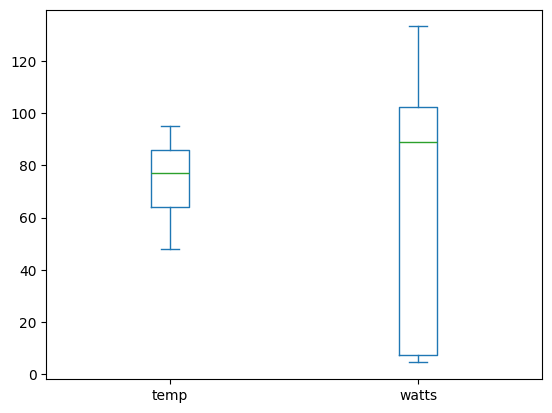

In [9]:
singlecpu[['temp', 'watts']].plot.box()

## Todo
Create the histograms for 'temp' and 'watts' each. Play around with the number of bins and observe the impression of the corresponding histograms.

Hint 1: Use the method 'plot.hist' of the pandas dataframe class, see the docs at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.hist.html

Hint 2: In order to handle overplotting use the parameter, e.g. 'alpha = 0.5'

<Axes: ylabel='Frequency'>

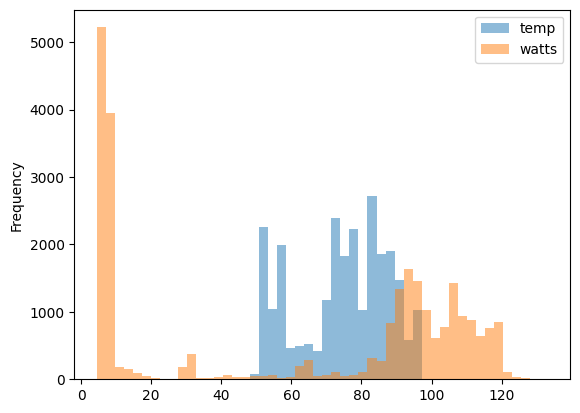

In [10]:
singlecpu[['temp', 'watts']].plot.hist(alpha=0.5, bins=50)

## Todo
1 ) Create the (univariate) kernel density for 'temp' and 'watts' each. Play around with the bandwith parameter and observe the impression of the corresponding graphs.

Hint: Use the method 'plot.kde' of the pandas dataframe class, see the docs at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.kde.html

2) Compare the kernel density estimates with the histograms. Use the parameter 'xlim' while plotting to get similar scaling esp. on the x-axis. Think about where to get the limit values.

<Axes: ylabel='Density'>

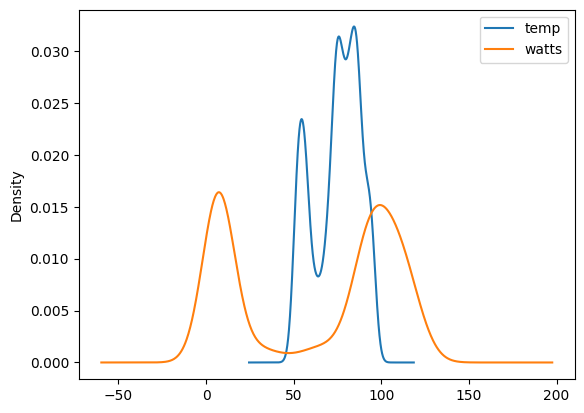

In [11]:
# (univariate) kernel density for 'temp' and 'watts'
singlecpu[['temp', 'watts']].plot.kde(bw_method=0.2)

In [14]:
import matplotlib.pyplot as plt

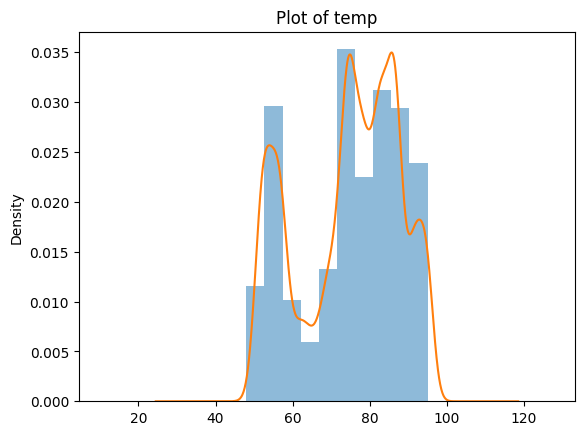

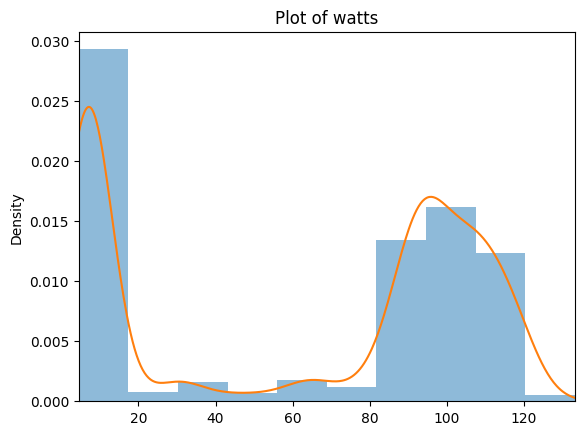

In [15]:
xmin = min(singlecpu['temp'].min(), singlecpu['watts'].min())
xmax = max(singlecpu['temp'].max(), singlecpu['watts'].max())

# temp
singlecpu['temp'].plot.hist(density=True, alpha=0.5)
singlecpu['temp'].plot.kde()
plt.xlim(xmin, xmax)
plt.title('Plot of temp')
plt.show()

# watts
singlecpu['watts'].plot.hist(density=True, alpha=0.5)
singlecpu['watts'].plot.kde()
plt.xlim(xmin, xmax)
plt.title('Plot of watts')
plt.show()

## Todo
Create a plot for 'temp' and 'watts' over time (both variables into one plot). Observe the interplay between the temperature and power consumption.

Hint 1: Use the method 'plot' of the pandas dataframe class, see the docs at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html

Hint 2a: If necessary, enlarge the plot size by using the parameter 'figsize'.

Hint 2b: In order to handle overplotting use the parameter, e.g. 'alpha = 0.5'

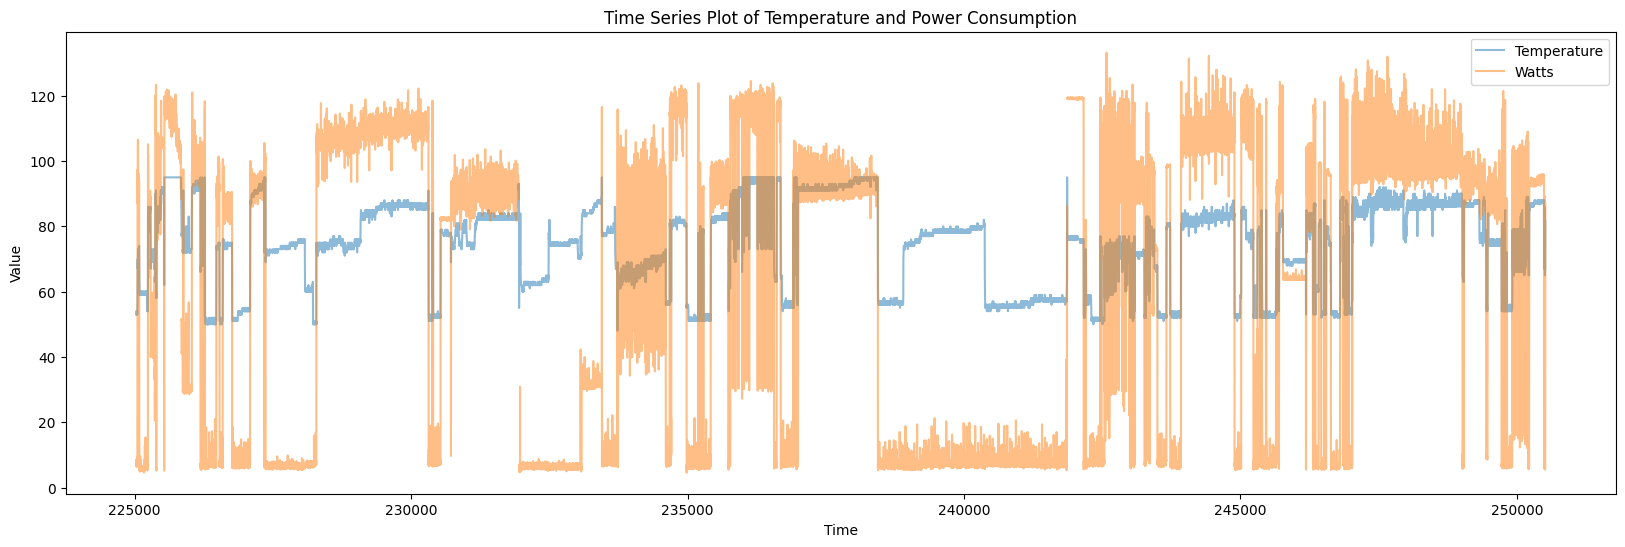

In [23]:
# time series plots for 'temp' and 'watts'
singlecpu[['temp', 'watts']].plot(
    figsize=(20, 6),
    alpha=0.5
)

# Add labels and title for clarity
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Plot of Temperature and Power Consumption')
plt.legend(['Temperature', 'Watts'])
plt.show()

## Todo
1) Create the two-dimensional scatterplot 'temp'(x-axis) vs. 'watts' (y-axis).

Hint 1: Use the method 'plot.scatter' of the pandas dataframe class, see the docs at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html

Hint 2a: If necessary, enlarge the plot size by using the parameter 'figsize'.

Hint 2b: In order to handle overplotting use the parameter, e.g. 'alpha = 0.5'.

Hint 2c: For improving readability use the parameter 'grid = True'.

2) What measure(s) might be appropriate to characterize the dependency (if any) between temperature and power consumption? What is possible to conclude referring causation?

<Axes: xlabel='temp', ylabel='watts'>

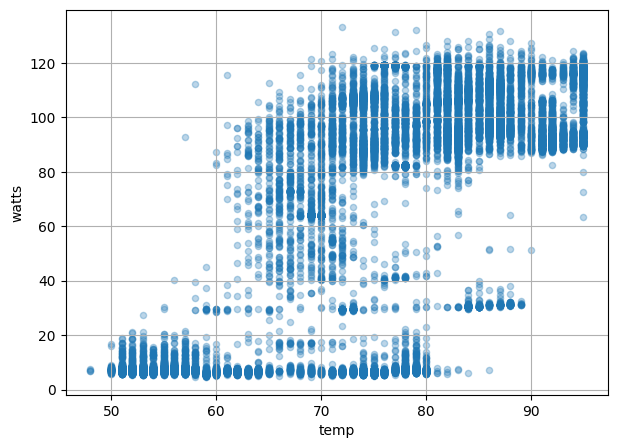

In [16]:
# two-dimensional scatterplot 'temp'(x-axis) vs. 'watts' (y-axis)
singlecpu.plot.scatter(x='temp', y='watts',
                       figsize=(7,5), alpha=0.3,
                       grid=True)

In [17]:
import scipy.stats as stats

print('p-value: ', stats.normaltest(singlecpu['temp'])[1])
print('p-value: ', stats.normaltest(singlecpu['watts'].dropna())[1])

p-value:  0.0
p-value:  0.0


As the P-values equal to 0.0, We can do the spearman test when we want to measure the correlation between temperature and watts.

In [18]:
spearman_corr = singlecpu['temp'].corr(singlecpu['watts'], method='spearman')
print(spearman_corr)

0.6723413210548523


As the value of correlation is 0.67, we can say the relation between temperature and watts is quite strong.

# Analysis Part 2 -- Multiple Nodes
In this part of the analysis we will work with the data of several CPUs at the simultaneously. This means that each analysis step refers to all CPUs contained in the data set. Therefore, so-called grouping variables are needed. For the present data set, these are the variables 'node' and 'cpu'. When grouping by these two, each existing combination (node, cpu) in the data is taken into account and the analysis step is performed accordingly for each combination.

## Todo
1) Calculate the basic descriptive statistics GROUPWISE, namely: mean, standard deviation, mininmum, maximum, all quartiles (i.e. quantiles with level 25%, 50%, 75%).

Hint 1: Use the method 'groupby' of pandas dataframe for groupwise consideration, see the docs at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Hint 2: Use the method 'describe' of pandas dataframe, see the docs at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

2) Do you see some indication for extreme values? Explain your observation with statistical measures!

In [19]:
# basic descriptive statistics GROUPWISE
df1 = taurusdata.groupby(['node', 'cpu'])

print('Description of Temperature \n')
df1['watts'].describe()

Description of Temperature 



count       mean        std        min        25%  \
node        cpu                                                         
taurusi5506 cpu1  29173.0  53.808665  40.679029   4.312403   8.249941   
taurusi5507 cpu0  29522.0  58.642931  38.939259  12.045717  14.982597   
taurusi5521 cpu0  26100.0  45.391113  38.495714  10.753604  14.216495   
            cpu1  26097.0  37.751906  38.369543   3.497129   6.428184   
taurusi6084 cpu0  29428.0  31.901632  29.268565   7.509039   9.714703   
            cpu1  29427.0  27.286328  31.859120   1.074336   3.422431   
taurusi6086 cpu0  17517.0  58.742685  41.110821   8.651045  11.849155   
            cpu1  17517.0  52.492451  42.750892   2.863930   5.851808   
taurusi6344 cpu0  25458.0  66.695515  43.271044  11.607922  14.605130   
            cpu1  25457.0  62.171613  45.525440   4.528585   7.363638   
taurusi6359 cpu0  23240.0  58.157199  41.202014  14.613485  17.312510   
            cpu1  23238.0  57.856508  48.016061   4.426021   7.362767   

                        50%         75%         max  
node        cpu                                      
taurusi5506 cpu1  52.446834   94.724171  126.864137  
taurusi5507 cpu0  44.524360   96.649831  126.373925  
taurusi5521 cpu0  16.312689   89.619704  128.415830  
            cpu1   8.126215   80.623251  128.265481  
taurusi6084 cpu0  10.855040   52.256975  132.871383  
            cpu1   6.637615   57.448843  132.580190  
taurusi6086 cpu0  80.645525   92.850747  132.572033  
            cpu1  68.728412   90.463830  132.693550  
taurusi6344 cpu0  90.234033  105.576003  131.897595  
            cpu1  88.820081  102.456565  133.179479  
taurusi6359 cpu0  46.249633  104.298636  132.221605  
            cpu1  41.027249  105.020142  133.249055

In [20]:
print('Description of Watts \n')
df1['watts'].describe()

Description of Watts 



count       mean        std        min        25%  \
node        cpu                                                         
taurusi5506 cpu1  29173.0  53.808665  40.679029   4.312403   8.249941   
taurusi5507 cpu0  29522.0  58.642931  38.939259  12.045717  14.982597   
taurusi5521 cpu0  26100.0  45.391113  38.495714  10.753604  14.216495   
            cpu1  26097.0  37.751906  38.369543   3.497129   6.428184   
taurusi6084 cpu0  29428.0  31.901632  29.268565   7.509039   9.714703   
            cpu1  29427.0  27.286328  31.859120   1.074336   3.422431   
taurusi6086 cpu0  17517.0  58.742685  41.110821   8.651045  11.849155   
            cpu1  17517.0  52.492451  42.750892   2.863930   5.851808   
taurusi6344 cpu0  25458.0  66.695515  43.271044  11.607922  14.605130   
            cpu1  25457.0  62.171613  45.525440   4.528585   7.363638   
taurusi6359 cpu0  23240.0  58.157199  41.202014  14.613485  17.312510   
            cpu1  23238.0  57.856508  48.016061   4.426021   7.362767   

                        50%         75%         max  
node        cpu                                      
taurusi5506 cpu1  52.446834   94.724171  126.864137  
taurusi5507 cpu0  44.524360   96.649831  126.373925  
taurusi5521 cpu0  16.312689   89.619704  128.415830  
            cpu1   8.126215   80.623251  128.265481  
taurusi6084 cpu0  10.855040   52.256975  132.871383  
            cpu1   6.637615   57.448843  132.580190  
taurusi6086 cpu0  80.645525   92.850747  132.572033  
            cpu1  68.728412   90.463830  132.693550  
taurusi6344 cpu0  90.234033  105.576003  131.897595  
            cpu1  88.820081  102.456565  133.179479  
taurusi6359 cpu0  46.249633  104.298636  132.221605  
            cpu1  41.027249  105.020142  133.249055

## Todo
1) Calculate the boxplots groupwise.

Hint: Grouping is not necessary as the method 'boxplot' has the parameter 'by'.

2) Do you see some indication for extreme values? Explain your observation with statistical measures!

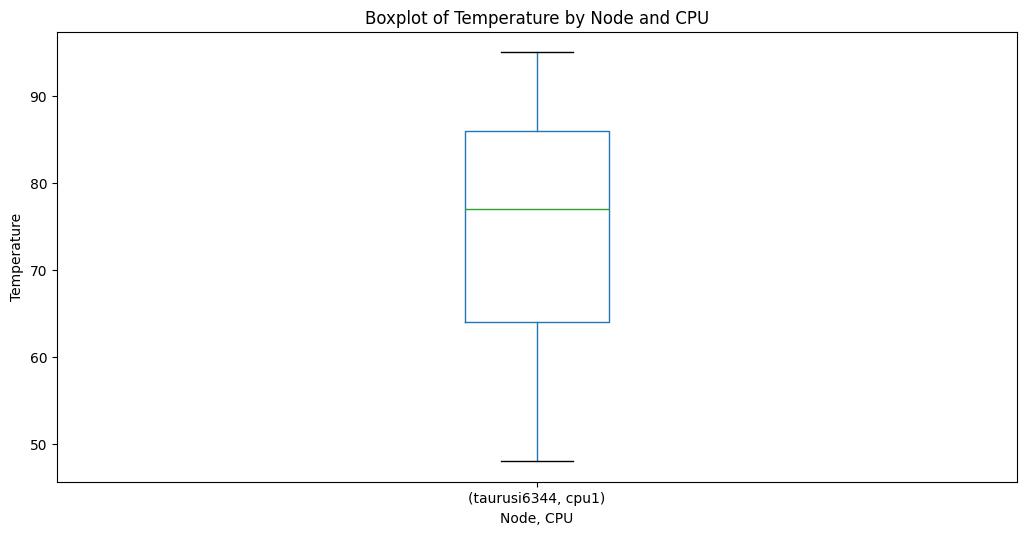

In [26]:
# boxplots groupwise - 'temp'
singlecpu.boxplot(column='temp',
                  by=['node', 'cpu'],
                  figsize=(12, 6),
                  grid=False)
plt.title('Boxplot of Temperature by Node and CPU')
plt.suptitle('')
plt.xlabel('Node, CPU')
plt.ylabel('Temperature')
plt.show()

No extreme values(As no dots are shown in the plot). Its distribution seems balanced.

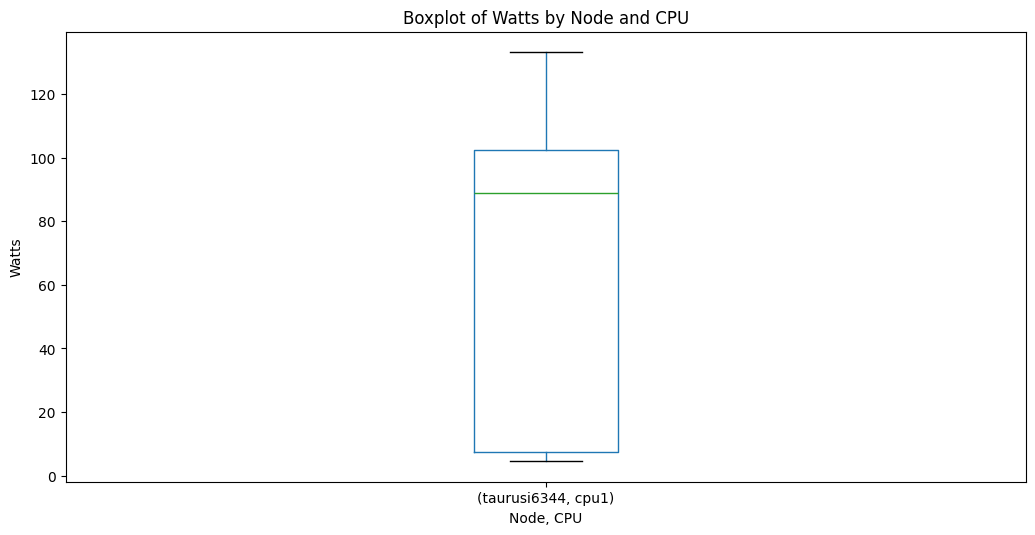

In [27]:
# boxplots groupwise - 'watts'
singlecpu.boxplot(column='watts', by=['node', 'cpu'], figsize=(12, 6), grid=False)
plt.title('Boxplot of Watts by Node and CPU')
plt.suptitle('')
plt.xlabel('Node, CPU')
plt.ylabel('Watts')
plt.show()

No extreme values(As no dots are shown in the plot). It is slightly skewed positively.

## Todo
1) Calculate the correlation between 'temp' and 'watts' groupwise.

2) Do you see some indication for extreme values? Explain your observation with statistical measures! Check for consistency of your indications with the groupwise boxplots from above!

In [28]:
# correlation between 'temp' and 'watts' groupwise
singlecpu['temp'].corr(singlecpu['watts'])

np.float64(0.7507491745685996)

The value of correlation is about 0.75, which means their correlation is strong enough. According to the value, the temperature rises as well as the amount of power comsumption rises.

And this result is consistent with my previous indications with the groupwise boxplots above - There are no extreme values in the dataset.